# AS6PR4

In [1]:
from sklearn.ensemble import AdaBoostClassifier
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import  classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv("seeds.csv")
data.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:

X = data.drop(columns="Type")
y=data["Type"]
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=10)


In [4]:
dt=DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=1)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
DT_acc = accuracy_score(y_test,y_pred)


In [5]:
gaussian_nb=GaussianNB()
gaussian_nb.fit(X_train,y_train)
y_pred = gaussian_nb.predict(X_test)
bayes_acc = accuracy_score(y_test,y_pred)



In [6]:
print("Accuracy of Decision Tree Classifier is : ", DT_acc*100)
print("Accuracy of GaussianNB is : ", bayes_acc*100)



Accuracy of Decision Tree Classifier is :  60.0
Accuracy of GaussianNB is :  91.66666666666666


In [7]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.6)
ada.fit(X_train,y_train)
ada_pred=ada.predict(X_test)
acc_ada=round(accuracy_score(y_test,ada_pred),3)
print(acc_ada)



0.85


In [8]:
ada_gnb=AdaBoostClassifier(base_estimator=GaussianNB(),n_estimators=100,learning_rate=0.5)
ada_gnb.fit(X_train,y_train)
agnb_pred=ada_gnb.predict(X_test)
acc_agnb=round(accuracy_score(y_test,agnb_pred),3)
print(acc_agnb*100)



91.7


In [9]:
print ("Unique values are : ", data.Type.unique())

Unique values are :  [1 2 3]


In [10]:
print("Count of Unique Values are : ", data['Type'].value_counts())

Count of Unique Values are :  2    68
1    66
3    65
Name: Type, dtype: int64


In [11]:
print ("Percentage of Unique values are", data['Type'].value_counts(normalize=True)*100)


Percentage of Unique values are 2    34.170854
1    33.165829
3    32.663317
Name: Type, dtype: float64


<BarContainer object of 4 artists>

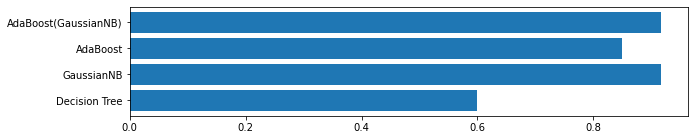

In [12]:
plt.figure(figsize=(10,2))
plt.barh(np.arange(4),[DT_acc,bayes_acc,acc_ada,acc_agnb],\
         tick_label=['Decision Tree','GaussianNB','AdaBoost','AdaBoost(GaussianNB)'])